In [75]:
import numpy as np
from numpy import mean, argmax
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_recall_curve, f1_score, auc, precision_score, roc_curve
import time
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

import psutil
import tracemalloc

from matplotlib import pyplot
from matplotlib.pyplot import figure

import platform
import cpuinfo

In [76]:
china_mean_noOutliers = pd.read_csv('C:/Users/boont/Desktop/szakdoga/sorted_with_mean_std.csv')
china_mean_noOutliers = china_mean_noOutliers.drop(['Unnamed: 0'], axis = 1)
china_mean_noOutliers
china_mean_noOutliers = china_mean_noOutliers.apply(lambda x: x.fillna(x.mean()),axis=0)
china_mean_noOutliers

,FLAG,MEAN,STD,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00,2014-01-07 00:00:00,...,2016-10-22 00:00:00,2016-10-23 00:00:00,2016-10-24 00:00:00,2016-10-25 00:00:00,2016-10-26 00:00:00,2016-10-27 00:00:00,2016-10-28 00:00:00,2016-10-29 00:00:00,2016-10-30 00:00:00,2016-10-31 00:00:00
0,1,13.898342,8.843958,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,0.000000,0.000000,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,9.921390,6.822524,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,1,14.612055,11.422513,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,8.249738,5.942354,2.900000,5.640000,6.990000,3.320000,3.610000,5.350000,4.730000,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39514,0,4.147203,1.583176,5.327215,5.161014,4.851788,5.053549,5.361211,5.019869,4.893738,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
39515,0,4.892765,1.581757,2.700000,0.000000,0.000000,5.720000,6.050000,5.810000,3.070000,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
39516,0,1.340594,1.880989,0.580000,1.160000,0.920000,0.980000,1.540000,1.380000,0.890000,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
39517,0,17.333685,6.776731,16.890000,15.150000,19.280000,17.190000,16.800000,17.480000,17.860000,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [77]:
X_full_mean_noOutliers = china_mean_noOutliers.drop(['FLAG'], axis = 1)
Y_full_mean_noOutliers = china_mean_noOutliers['FLAG']

In [78]:
X_train_full_mean_noOutliers, X_test_full_mean_noOutliers, Y_train_full_mean_noOutliers, Y_test_full_mean_noOutliers = train_test_split(X_full_mean_noOutliers, Y_full_mean_noOutliers, test_size = 0.2, random_state = 42)

# default

In [79]:
xgb_default = XGBClassifier()

In [80]:
tracemalloc.start()

start = time.time()
xgb_default.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 129.5391881465912sec
Current memory usage is 131.314251MB; Peak was 655.484767MB


In [81]:
# predictions
xgb_default_y_pred_full = xgb_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_default_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, xgb_default_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.9223178137651822
Recall: 0.5897418986061645
[[7158   24]
 [ 590  132]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7182
           1       0.85      0.18      0.30       722

    accuracy                           0.92      7904
   macro avg       0.89      0.59      0.63      7904
weighted avg       0.92      0.92      0.90      7904

AUC: 0.8255139811671377


In [82]:
xgb_probs_default = xgb_default.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_default = xgb_probs_default[:,1]
xgb_precision_default, xgb_recall_default, xgb_threshold_default = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_default)
xgb_f1_default, xgb_auc_default = f1_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_full), auc(xgb_recall_default, xgb_precision_default)
xgb_default_tn, xgb_default_fp, xgb_default_fn, xgb_default_tp = confusion_matrix(Y_test_full_mean_noOutliers, xgb_default_y_pred_full).ravel()
xgb_default_tn_percent = xgb_default_tn / len(X_test_full_mean_noOutliers.index)
xgb_default_fp_percent = xgb_default_fp / len(X_test_full_mean_noOutliers.index)
xgb_default_fn_percent = xgb_default_fn / len(X_test_full_mean_noOutliers.index)
xgb_default_tp_percent = xgb_default_tp / len(X_test_full_mean_noOutliers.index)

# default + smote

In [83]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_mean_noOutliers)
print('Before', counter)
smt = SMOTE()

X_train_oversampled_sm_full, Y_train_sm_full = smt.fit_resample(X_train_full_mean_noOutliers, Y_train_full_mean_noOutliers)
X_train_sm_full = pd.DataFrame(X_train_oversampled_sm_full, columns=X_train_full_mean_noOutliers.columns)

counter = Counter(Y_train_sm_full)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({0: 28883, 1: 28883})
Training time: 16.446617126464844sec
Current memory usage is 504.176558MB; Peak was 983.076742MB


In [84]:
tracemalloc.start()

start = time.time()
xgb_default.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 310.8575463294983sec
Current memory usage is 239.786279MB; Peak was 719.060859MB


In [85]:
# predictions
xgb_default_y_pred_sm_full = xgb_default.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb_default.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.7973178137651822
Recall: 0.7009775901742661
[[5881 1301]
 [ 301  421]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7182
           1       0.24      0.58      0.34       722

    accuracy                           0.80      7904
   macro avg       0.60      0.70      0.61      7904
weighted avg       0.89      0.80      0.83      7904

AUC: 0.7788563822606684


In [86]:
xgb_probs_default_smt = xgb_default.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_default_smt = xgb_probs_default_smt[:,1]
xgb_precision_default_smt, xgb_recall_default_smt, xgb_threshold_default_smt = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_default_smt)
xgb_f1_default_smt, xgb_auc_default_smt = f1_score(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full), auc(xgb_recall_default_smt, xgb_precision_default_smt)
xgb_default_smt_tn, xgb_default_smt_fp, xgb_default_smt_fn, xgb_default_smt_tp = confusion_matrix(Y_test_full_mean_noOutliers, xgb_default_y_pred_sm_full).ravel()
xgb_default_smt_tn_percent = xgb_default_smt_tn / len(X_test_full_mean_noOutliers.index)
xgb_default_smt_fp_percent = xgb_default_smt_fp / len(X_test_full_mean_noOutliers.index)
xgb_default_smt_fn_percent = xgb_default_smt_fn / len(X_test_full_mean_noOutliers.index)
xgb_default_smt_tp_percent = xgb_default_smt_tp / len(X_test_full_mean_noOutliers.index)

# tuned

In [87]:
xgb_tuned = XGBClassifier(max_depth = 10, min_child_weight = 15, max_delta_step = 5, scale_pos_weight = 12)

In [88]:
tracemalloc.start()

start = time.time()
xgb_tuned.fit(X_train_full_mean_noOutliers,Y_train_full_mean_noOutliers)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 388.6659801006317sec
Current memory usage is 131.310095MB; Peak was 655.484535MB


In [89]:
# predictions
xgb_tuned_y_pred_full = xgb_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full))
print(classification_report(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.9104251012145749
Recall: 0.6928285626346568
[[6888  294]
 [ 414  308]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7182
           1       0.51      0.43      0.47       722

    accuracy                           0.91      7904
   macro avg       0.73      0.69      0.71      7904
weighted avg       0.90      0.91      0.91      7904

AUC: 0.8492325766709787


In [90]:
xgb_probs_tuned = xgb_tuned.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_tuned = xgb_probs_tuned[:,1]
xgb_precision_tuned, xgb_recall_tuned, xgb_threshold_tuned = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_tuned)
xgb_f1_tuned, xgb_auc_tuned = f1_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full), auc(xgb_recall_tuned, xgb_precision_tuned)
xgb_tuned_tn, xgb_tuned_fp, xgb_tuned_fn, xgb_tuned_tp = confusion_matrix(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_full).ravel()
xgb_tuned_tn_percent = xgb_tuned_tn / len(X_test_full_mean_noOutliers.index)
xgb_tuned_fp_percent = xgb_tuned_fp / len(X_test_full_mean_noOutliers.index)
xgb_tuned_fn_percent = xgb_tuned_fn / len(X_test_full_mean_noOutliers.index)
xgb_tuned_tp_percent = xgb_tuned_tp / len(X_test_full_mean_noOutliers.index)

# tuned + smote

In [91]:
tracemalloc.start()

start = time.time()
xgb_tuned.fit(X_train_sm_full,Y_train_sm_full)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 1047.8541522026062sec
Current memory usage is 239.786296MB; Peak was 719.060675MB


In [92]:
# predictions
xgb_tuned_y_pred_sm_full = xgb_tuned.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full))
print(classification_report(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb_tuned.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.7560728744939271
Recall: 0.7293599495815563
[[5473 1709]
 [ 219  503]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7182
           1       0.23      0.70      0.34       722

    accuracy                           0.76      7904
   macro avg       0.59      0.73      0.60      7904
weighted avg       0.89      0.76      0.80      7904

AUC: 0.8144426162358807


In [93]:
xgb_probs_tuned_smt = xgb_tuned.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_tuned_smt = xgb_probs_tuned_smt[:,1]
xgb_precision_tuned_smt, xgb_recall_tuned_smt, xgb_threshold_tuned_smt = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_tuned_smt)
xgb_f1_tuned_smt, xgb_auc_tuned_smt = f1_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full), auc(xgb_recall_tuned_smt, xgb_precision_tuned_smt)
xgb_tuned_smt_tn, xgb_tuned_smt_fp, xgb_tuned_smt_fn, xgb_tuned_smt_tp = confusion_matrix(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full).ravel()
xgb_tuned_smt_tn_percent = xgb_tuned_smt_tn / len(X_test_full_mean_noOutliers.index)
xgb_tuned_smt_fp_percent = xgb_tuned_smt_fp / len(X_test_full_mean_noOutliers.index)
xgb_tuned_smt_fn_percent = xgb_tuned_smt_fn / len(X_test_full_mean_noOutliers.index)
xgb_tuned_smt_tp_percent = xgb_tuned_smt_tp / len(X_test_full_mean_noOutliers.index)

## tuned + SMOTEEN

In [94]:
tracemalloc.start()

start = time.time()
counter = Counter(Y_train_full_mean_noOutliers)
print('Before', counter)
smenn = SMOTEENN()

X_train_smenn, Y_train_smenn = smenn.fit_resample(X_train_full_mean_noOutliers, Y_train_full_mean_noOutliers)
X_train_smenn = pd.DataFrame(X_train_smenn, columns=X_train_full_mean_noOutliers.columns)

counter = Counter(Y_train_smenn)
print('After', counter)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Before Counter({0: 28883, 1: 2732})
After Counter({1: 28672, 0: 15357})
Training time: 3352.6598613262177sec
Current memory usage is 903.806851MB; Peak was 1145.364063MB


In [95]:
tracemalloc.start()

start = time.time()
xgb_smenn.fit(X_train_smenn,Y_train_smenn)
stop = time.time()
print(f"Training time: {stop - start}sec")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()

Training time: 808.7026727199554sec
Current memory usage is 182.803504MB; Peak was 548.118024MB


In [96]:
#predictions
xgb_y_pred_smenn = xgb_smenn.predict(X_test_full_mean_noOutliers)
print(f"Accuracy: {accuracy_score(Y_test_full_mean_noOutliers, xgb_y_pred_smenn)}")
print(f"Recall: {recall_score(Y_test_full_mean_noOutliers, xgb_y_pred_smenn, average='macro')}")
print(confusion_matrix(Y_test_full_mean_noOutliers, xgb_y_pred_smenn))
print(classification_report(Y_test_full_mean_noOutliers, xgb_y_pred_smenn))
print(f"AUC: {roc_auc_score(Y_test_full_mean_noOutliers, xgb_smenn.predict_proba(X_test_full_mean_noOutliers)[:,1])}")

Accuracy: 0.6527074898785425
Recall: 0.7316573597737033
[[4561 2621]
 [ 124  598]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      7182
           1       0.19      0.83      0.30       722

    accuracy                           0.65      7904
   macro avg       0.58      0.73      0.54      7904
weighted avg       0.90      0.65      0.73      7904

AUC: 0.8226295386048994


In [97]:
xgb_probs_tuned_smenn = xgb_smenn.predict_proba(X_test_full_mean_noOutliers)
xgb_probs_tuned_smenn = xgb_probs_tuned_smenn[:,1]
xgb_precision_tuned_smenn, xgb_recall_tuned_smenn, xgb_threshold_tuned_smenn = precision_recall_curve(Y_test_full_mean_noOutliers, xgb_probs_tuned_smenn)
xgb_f1_tuned_smenn, xgb_auc_tuned_smenn = f1_score(Y_test_full_mean_noOutliers, xgb_tuned_y_pred_sm_full), auc(xgb_recall_tuned_smenn, xgb_precision_tuned_smenn)
xgb_tuned_smenn_tn, xgb_tuned_smenn_fp, xgb_tuned_smenn_fn, xgb_tuned_smenn_tp = confusion_matrix(Y_test_full_mean_noOutliers, xgb_y_pred_smenn).ravel()
xgb_tuned_smenn_tn_percent = xgb_tuned_smenn_tn / X_test_full_mean_noOutliers.shape[0]
xgb_tuned_smenn_fp_percent = xgb_tuned_smenn_fp / X_test_full_mean_noOutliers.shape[0]
xgb_tuned_smenn_fn_percent = xgb_tuned_smenn_fn / X_test_full_mean_noOutliers.shape[0]
xgb_tuned_smenn_tp_percent = xgb_tuned_smenn_tp / X_test_full_mean_noOutliers.shape[0]

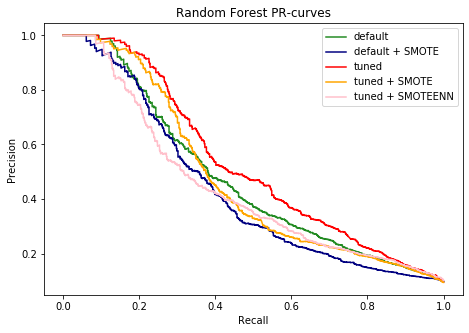

In [98]:
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_title('Random Forest PR-curves')
ax.plot(xgb_recall_default, xgb_precision_default, color='forestgreen', label='default')
ax.plot(xgb_recall_default_smt, xgb_precision_default_smt, color='navy', label='default + SMOTE')
ax.plot(xgb_recall_tuned, xgb_precision_tuned, color='red', label='tuned')
ax.plot(xgb_recall_tuned_smt, xgb_precision_tuned_smt, color='orange', label='tuned + SMOTE')
ax.plot(xgb_recall_tuned_smenn, xgb_precision_tuned_smenn, color='pink', label='tuned + SMOTEENN')
ax.set(xlabel='Recall', ylabel='Precision')
ax.legend()

In [99]:
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

gs = gridspec.GridSpec(2, 4, width_ratios = [15, 15, 15, 15], height_ratios = [15, 15])
gs.update(wspace=0.5)

# default + smote charts

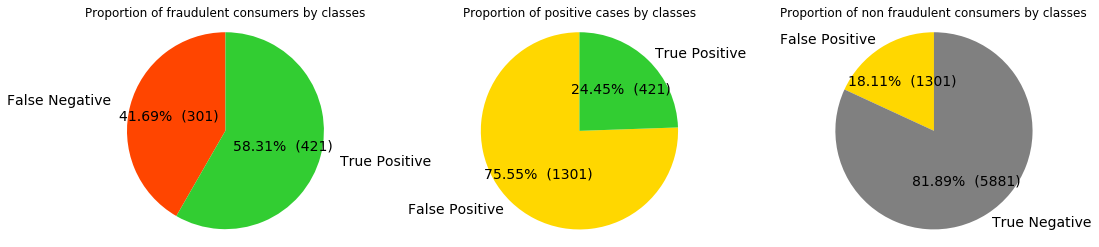

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_default_smt_fn, xgb_default_smt_tp]

ax1.set_title('Proportion of fraudulent consumers by classes')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14}, labeldistance=1.2)
ax1.axis('equal')


labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_default_smt_fp, xgb_default_smt_tp]

ax2.set_title('Proportion of positive cases by classes')
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')


labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_default_smt_fp, xgb_default_smt_tn]

ax3.set_title('Proportion of non fraudulent consumers by classes')
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')

plt.show()

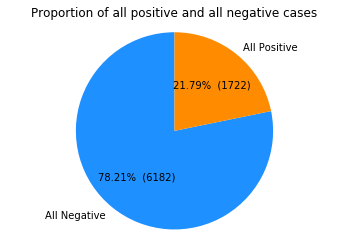

In [101]:
fig1, ax1= plt.subplots()

labels_tp_fn = 'All Negative', 'All Positive'
sizes_tp_fn = [xgb_default_smt_fn + xgb_default_smt_tn, xgb_default_smt_tp + xgb_default_smt_fp]

ax1.set_title('Proportion of all positive and all negative cases')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['dodgerblue', 'darkorange'])
ax1.axis('equal')

plt.show()

# tuned charts

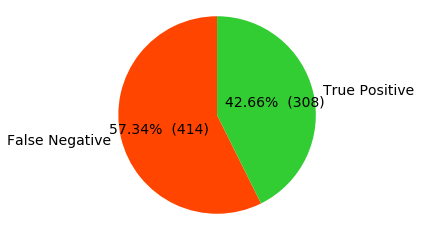

In [102]:
labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_fn, xgb_tuned_tp]


fig, ax1 = plt.subplots()
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

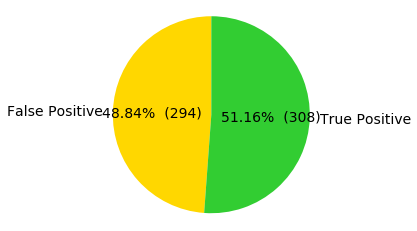

In [103]:
labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_fp, xgb_tuned_tp]

fig, ax2 = plt.subplots()
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')
plt.show()

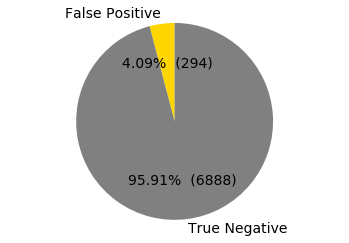

In [104]:
labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_fp, xgb_tuned_tn]

fig, ax3 = plt.subplots()
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')
plt.show()

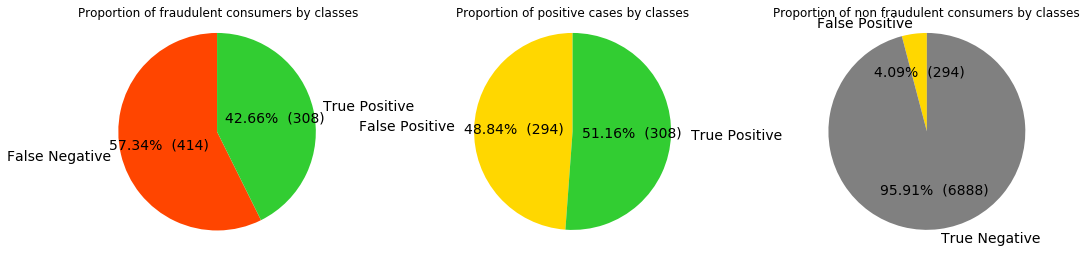

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_fn, xgb_tuned_tp]

ax1.set_title('Proportion of fraudulent consumers by classes')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')


labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_fp, xgb_tuned_tp]

ax2.set_title('Proportion of positive cases by classes')
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14}, labeldistance=1.2)
ax2.axis('equal')


labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_fp, xgb_tuned_tn]

ax3.set_title('Proportion of non fraudulent consumers by classes')
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')

plt.show()

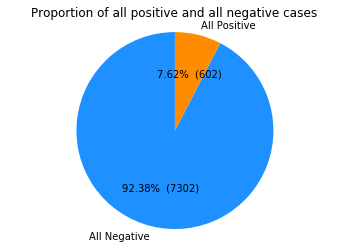

In [106]:
fig1, ax1= plt.subplots()

labels_tp_fn = 'All Negative', 'All Positive'
sizes_tp_fn = [xgb_tuned_fn + xgb_tuned_tn, xgb_tuned_tp + xgb_tuned_fp]

ax1.set_title('Proportion of all positive and all negative cases')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['dodgerblue', 'darkorange'])
ax1.axis('equal')


plt.show()

# tuned + SMOTE charts

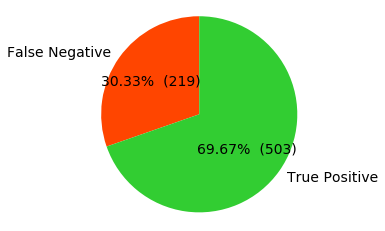

In [107]:
labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_smt_fn, xgb_tuned_smt_tp]


fig, ax1 = plt.subplots()
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

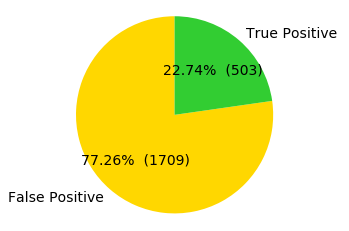

In [108]:
labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_smt_fp, xgb_tuned_smt_tp]

fig, ax2 = plt.subplots()
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')
plt.show()

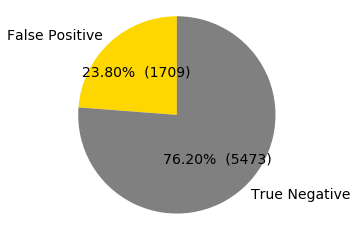

In [109]:
labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_smt_fp, xgb_tuned_smt_tn]

fig, ax3 = plt.subplots()
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')
plt.show()

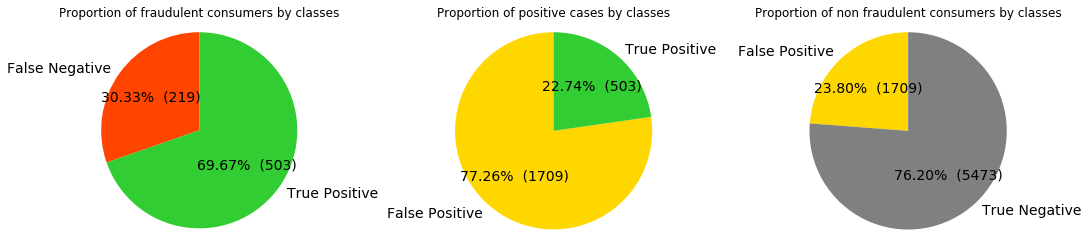

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_smt_fn, xgb_tuned_smt_tp]

ax1.set_title('Proportion of fraudulent consumers by classes')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_smt_fp, xgb_tuned_smt_tp]


ax2.set_title('Proportion of positive cases by classes')
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_smt_fp, xgb_tuned_smt_tn]

ax3.set_title('Proportion of non fraudulent consumers by classes')
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')

plt.show()

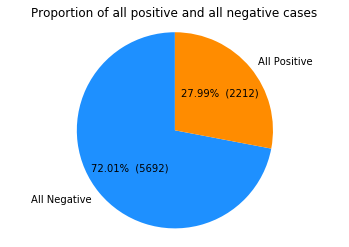

In [111]:
fig1, ax1= plt.subplots()

labels_tp_fn = 'All Negative', 'All Positive'
sizes_tp_fn = [xgb_tuned_smt_fn + xgb_tuned_smt_tn, xgb_tuned_smt_tp + xgb_tuned_smt_fp]

ax1.set_title('Proportion of all positive and all negative cases')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['dodgerblue', 'darkorange'])
ax1.axis('equal')

plt.show()

# tuned + SMOTEENN

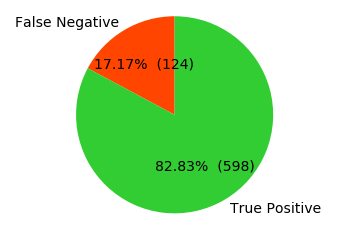

In [112]:
labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_smenn_fn, xgb_tuned_smenn_tp]


fig, ax1 = plt.subplots()
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

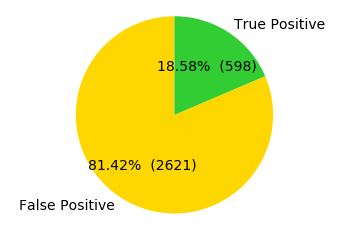

In [113]:
labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_smenn_fp, xgb_tuned_smenn_tp]

fig, ax2 = plt.subplots()
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')
plt.show()

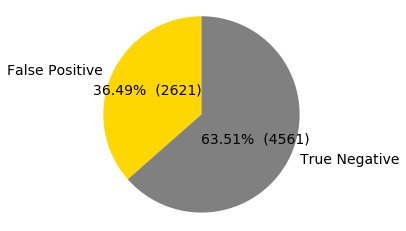

In [114]:
labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_smenn_fp, xgb_tuned_smenn_tn]

fig, ax3 = plt.subplots()
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

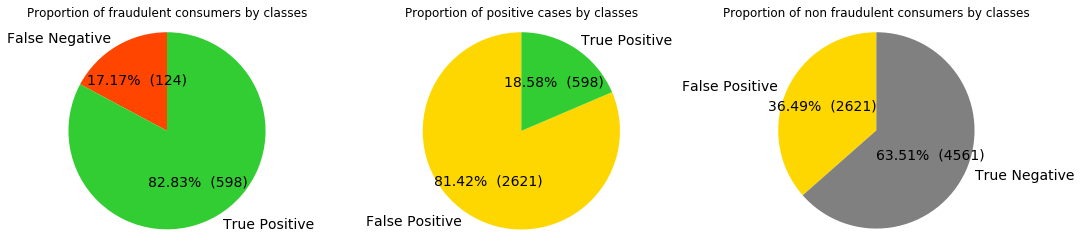

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

labels_tp_fn = 'False Negative', 'True Positive'
sizes_tp_fn = [xgb_tuned_smenn_fn, xgb_tuned_smenn_tp]

ax1.set_title('Proportion of fraudulent consumers by classes')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['orangered', 'limegreen'], textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels_tp_fp = 'False Positive', 'True Positive'
sizes_tp_fp = [xgb_tuned_smenn_fp, xgb_tuned_smenn_tp]

ax2.set_title('Proportion of positive cases by classes')
ax2.pie(sizes_tp_fp, labels=labels_tp_fp, autopct=make_autopct(sizes_tp_fp),
        shadow=False, startangle=90, colors=['gold', 'limegreen'], textprops={'fontsize': 14})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels_tn_fp = 'False Positive', 'True Negative'
sizes_tn_fp = [xgb_tuned_smenn_fp, xgb_tuned_smenn_tn]

ax3.set_title('Proportion of non fraudulent consumers by classes')
ax3.pie(sizes_tn_fp, labels=labels_tn_fp, autopct=make_autopct(sizes_tn_fp),
        shadow=False, startangle=90, colors=['gold', 'grey'], textprops={'fontsize': 14})
ax3.axis('equal')

plt.show()

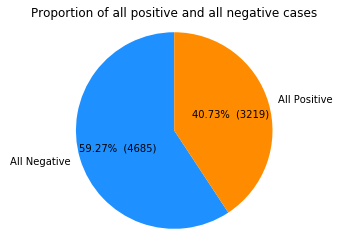

In [116]:
fig1, ax1= plt.subplots()

labels_tp_fn = 'All Negative', 'All Positive'
sizes_tp_fn = [xgb_tuned_smenn_fn + xgb_tuned_smenn_tn, xgb_tuned_smenn_tp + xgb_tuned_smenn_fp]

ax1.set_title('Proportion of all positive and all negative cases')
ax1.pie(sizes_tp_fn, labels=labels_tp_fn, autopct=make_autopct(sizes_tp_fn),
        shadow=False, startangle=90, colors=['dodgerblue', 'darkorange'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()